In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd

In [ ]:
import csv

In [ ]:
fields=['Subject','CAT-1','CAT-2','FAT','DA-1','DA-2','RESULT']
data=[['ECE-3501',40,25,30,5,8,'F'],
      ['CSE-3001',45,37,45,9,8,'P'],
      ['CSE-2401',48,45,70,9,10,'P'],
      ['CSE-3601',20,15,25,6,4,'F'],
      ['PHY-1201',49,46,87,10,9,'P'],
      ['CSE-8701',37,43,65,7,6,'P'],
      ['CSE-5401',20,15,23,4,6,'F'],
      ['CSE-2012',20,18,19,2,7,'F'],
      ['CSE-5401',22,18,23,2,1,'F'],
      ['CSE-7421',49,45,85,8,9,'P']
      ]

In [ ]:
file_name="FallSem_marks.csv"
with open(file_name,'w') as csvfile:
  csvwriter=csv.writer(csvfile)
  csvwriter.writerow(fields)
  csvwriter.writerows(data)

In [ ]:
data=pd.read_csv("FallSem_marks.csv")

In [ ]:
data.head()

,Subject,CAT-1,CAT-2,FAT,DA-1,DA-2,RESULT
0,ECE-3501,40,25,30,5,8,F
1,CSE-3001,45,37,45,9,8,P
2,CSE-2401,48,45,70,9,10,P
3,CSE-3601,20,15,25,6,4,F
4,PHY-1201,49,46,87,10,9,P


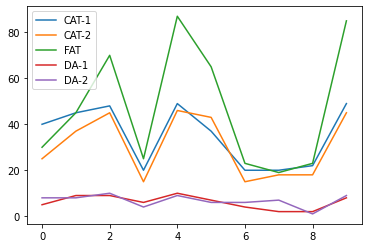

In [ ]:
data.plot()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data['RESULT'].replace(['P','F'],[0,1],inplace=True)

In [ ]:
data.head()

,Subject,CAT-1,CAT-2,FAT,DA-1,DA-2,RESULT
0,ECE-3501,40,25,30,5,8,1
1,CSE-3001,45,37,45,9,8,0
2,CSE-2401,48,45,70,9,10,0
3,CSE-3601,20,15,25,6,4,1
4,PHY-1201,49,46,87,10,9,0


In [ ]:
y=data['RESULT']
x=data.drop(['RESULT','Subject'],axis=1)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
model1=DecisionTreeClassifier(max_depth=5)

In [ ]:
model2=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.002)

In [ ]:
model1.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5)

In [ ]:
from sklearn import tree

[Text(0.5, 0.75, 'X[0] <= 42.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

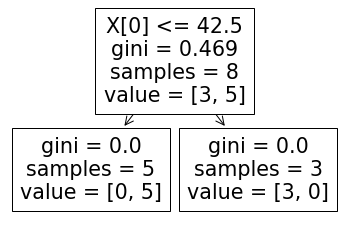

In [ ]:
tree.plot_tree(model1)

In [ ]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.002)

[Text(0.5, 0.75, 'X[2] <= 37.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

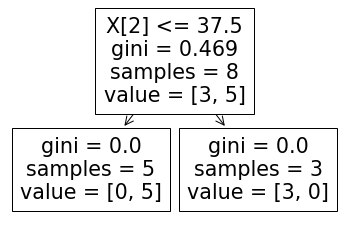

In [ ]:
tree.plot_tree(model2)

In [ ]:
model2.score(xtest,ytest)*100

100.0

In [ ]:
model1.score(xtest,ytest)*100

50.0

In [ ]:
ypred1=model1.predict(xtest)
ypred2=model2.predict(xtest)

In [ ]:
print(metrics.classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
metrics.confusion_matrix(ytest,ypred1)

array([[1, 1],
       [0, 0]])

In [ ]:
metrics.confusion_matrix(ytest,ypred2)

array([[2]])

In [ ]:
data2=pd.read_csv('play_tennis.csv')

In [ ]:
data2.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
data2.drop('day',axis=1)

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data2:
  data2[i]=le.fit_transform(data2[i])

In [ ]:
data2.head()

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1


In [ ]:
data

,Subject,CAT-1,CAT-2,FAT,DA-1,DA-2,RESULT
0,ECE-3501,40,25,30,5,8,1
1,CSE-3001,45,37,45,9,8,0
2,CSE-2401,48,45,70,9,10,0
3,CSE-3601,20,15,25,6,4,1
4,PHY-1201,49,46,87,10,9,0
5,CSE-8701,37,43,65,7,6,0
6,CSE-5401,20,15,23,4,6,1
7,CSE-2012,20,18,19,2,7,1
8,CSE-5401,22,18,23,2,1,1
9,CSE-7421,49,45,85,8,9,0


In [ ]:
model3=DecisionTreeClassifier(max_depth=5)
